Faster RCNN model

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/42028/A3

Mounted at /content/gdrive
/content/gdrive/MyDrive/42028/A3


In [ ]:
!git clone https://github.com/GitarthVaishnav/FasterRCNN42028.git

Cloning into 'FasterRCNN42028'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 124 (delta 51), reused 108 (delta 37), pack-reused 0
Receiving objects: 100% (124/124), 4.28 MiB | 13.48 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [20]:
# Enter the repo directory.
%cd FasterRCNN42028/

[Errno 2] No such file or directory: 'FasterRCNN42028/'
/content/gdrive/.shortcut-targets-by-id/1fgqgtXdFj3XMt4qrX_xWuFnAjAWI5LaD/PASCAL


In [3]:
# Install the Requirements
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 

In [22]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/gdrive/MyDrive/42028/A3/PASCAL/images/train'
TRAIN_DIR_LABELS: '/content/gdrive/MyDrive/42028/A3/PASCAL/labels/train'
VALID_DIR_IMAGES: '/content/gdrive/MyDrive/42028/A3/PASCAL/images/val'
VALID_DIR_LABELS: '/content/gdrive/MyDrive/42028/A3/PASCAL/labels/val'
# TEST_DIR_IMAGES: '/content/gdrive/MyDrive/42028/A3/PASCAL/images/test' 
# TEST_DIR_LABELS: '/content/gdrive/MyDrive/42028/A3/PASCAL/labels/test' 
# Class names.
CLASSES: [
    '__background__',
    'empty_seat'  
]

NC: 2

SAVE_VALID_PREDICTION_IMAGES: True

Overwriting data_configs/custom_data.yaml


In [21]:
%cd /content/gdrive/MyDrive/42028/A3/FasterRCNN42028
!ls 

/content/gdrive/MyDrive/42028/A3/FasterRCNN42028
_config.yml   example_test_data   notebook_examples  requirements.txt
data	      inference.py	  outputs	     torch_utils
data_configs  inference_video.py  __pycache__	     train.py
datasets.py   __init__.py	  readme_images      utils
eval.py       models		  README.md	     wandb


In [9]:
!cat /content/gdrive/MyDrive/42028/A3/FasterRCNN42028/data_configs/custom_data.yaml

# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/gdrive/Shareddrives/PASCAL/images/train'
TRAIN_DIR_LABELS: '/content/gdrive/Shareddrives/PASCAL/labels/train'
VALID_DIR_IMAGES: '/content/gdrive/Shareddrives/PASCAL/images/val'
VALID_DIR_LABELS: '/content/gdrive/Shareddrives/PASCAL/labels/val'
# TEST_DIR_IMAGES: '/content/gdrive/Shareddrives/PASCAL/images/test' 
# TEST_DIR_LABELS: '/content/gdrive/Shareddrives/PASCAL/labels/test' 
# Class names.
CLASSES: [
    '__background__',
    'Empty'  
]

NC: 2

SAVE_VALID_PREDICTION_IMAGES: True


In [24]:
import torch
torch.cuda.empty_cache()

In [6]:
!wandb disabled

W&B disabled.


In [26]:
!python train.py --config data_configs/custom_data.yaml --epochs 10 --model fasterrcnn_resnet50_fpn_v2 --project-name seat --batch-size 4 --no-mosaic

Not using distributed mode
device cuda
2023-05-22 07:47:55.213227: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 07:47:56.222154: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Creating data loaders
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Number of training samples: 

## Visualize Validation Results

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

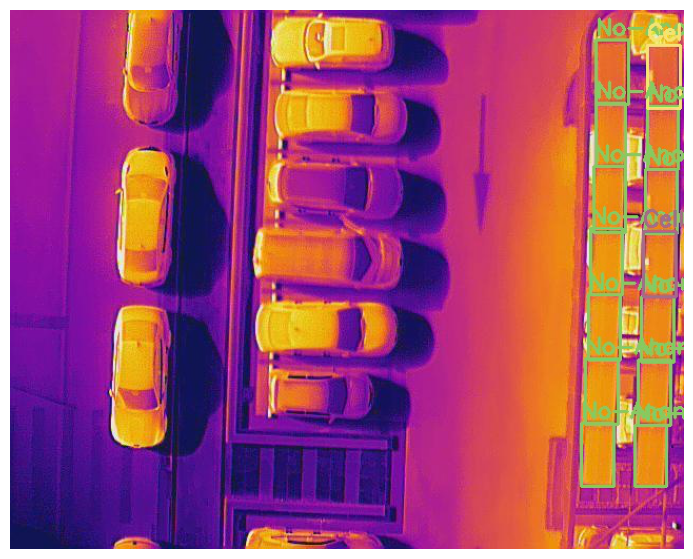

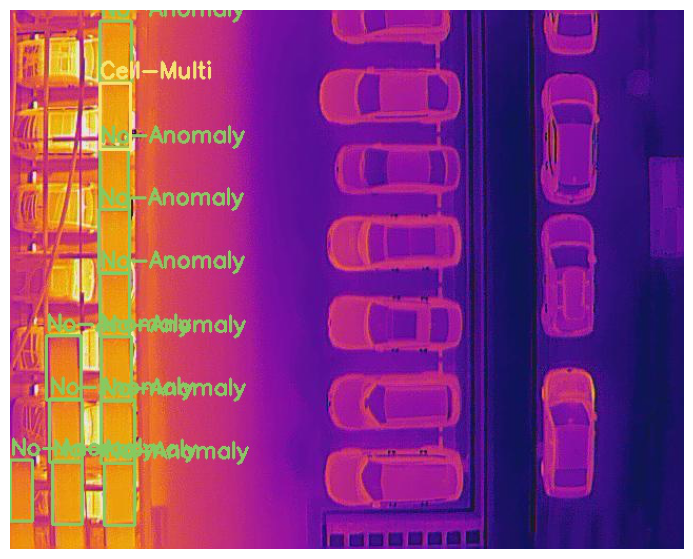

In [ ]:
results_dir_path = '/content/gdrive/MyDrive/42028/a2/FasterRCNN42028/outputs/training/thermal'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [28]:
# Verbose mAP.
!python eval.py --weights outputs/training/seat/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 26/26 [00:39<00:00,  1.54s/it]


{'map': tensor(0.9726),
 'map_50': tensor(0.9802),
 'map_75': tensor(0.9796),
 'map_large': tensor(0.9889),
 'map_medium': tensor(0.9652),
 'map_per_class': tensor(0.9726),
 'map_small': tensor(0.9937),
 'mar_1': tensor(0.0829),
 'mar_10': tensor(0.8304),
 'mar_100': tensor(0.9782),
 'mar_100_per_class': tensor(0.9782),
 'mar_large': tensor(0.9925),
 'mar_medium': tensor(0.9757),
 'mar_small': tensor(0.9987)}


"Classes: ['__background__', 'empty_seat']"


AP / AR per class
--------